In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import numpy as np

import tensorflow
import sklearn
from sklearn.model_selection import train_test_split

import cv2
from cv2 import cv2

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:

X = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CTP-ASL/ASL Dataset/Pickle96/X-CNN-96-numlabels.pickle', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CTP-ASL/ASL Dataset/Pickle96/y-CNN-96-numlabels.pickle', 'rb'))
# CATEGORIES = pickle.load(open('/content/drive/My Drive/Colab Notebooks/CTP-ASL/data/CATEGORIES.pickle', 'rb'))
CATEGORIES = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
               'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
               'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']

In [3]:
# X = X / 255.0

In [4]:
print(X.shape)
print(y.shape)

(10581, 96, 96)
(10581,)


In [5]:
print(CATEGORIES)
print(type(CATEGORIES))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
<class 'list'>


(96, 96)


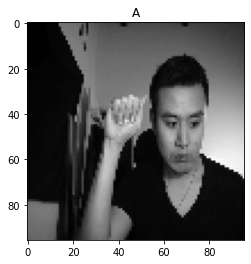

In [6]:
plt.title(  CATEGORIES[y[0]] )
plt.imshow(X[0], cmap="gray")


print(X[0].shape)

In [7]:
# Reshape the images to 64 x 64
newX = []
for img in X:
  newX.append(cv2.resize(img, (64, 64)))
X = np.asarray(newX)

print(type(X), X.shape)
X = X.reshape(-1, 64, 64, 1)
print(X.shape)

<class 'numpy.ndarray'> (10581, 64, 64)
(10581, 64, 64, 1)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
# del X
# del y

In [10]:
print("X_train[0]: ")
print(X_train[0].shape)

X_train[0]: 
(64, 64, 1)


In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape,'' ,y_test.shape)
print('*'*30)
print(X_train.shape[0] + X_test.shape[0])

(9522, 64, 64, 1) (9522,)
(1059, 64, 64, 1)  (1059,)
******************************
10581


In [13]:
# X = X_train / 255.0
# del X_train

In [14]:
IMG_DIMS = X.shape[1:]
print(IMG_DIMS)

(64, 64, 1)


In [15]:
def create_model():
  model = tensorflow.keras.models.Sequential()

  model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=IMG_DIMS))
  model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
  model.add(tensorflow.keras.layers.MaxPool2D())

  model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
  model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
  model.add(tensorflow.keras.layers.MaxPool2D())

  model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
  model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
  model.add(tensorflow.keras.layers.MaxPool2D())

  model.add(tensorflow.keras.layers.Flatten())

  model.add(tensorflow.keras.layers.Dense(512, activation='relu'))
  model.add(tensorflow.keras.layers.Dropout(0.3))
  model.add(tensorflow.keras.layers.Dense(512, activation='relu'))
  model.add(tensorflow.keras.layers.Dropout(0.3))
  model.add(tensorflow.keras.layers.Dense(256, activation='relu'))
  model.add(tensorflow.keras.layers.Dense(128, activation='relu'))
  model.add(tensorflow.keras.layers.Dense(29, activation='softmax'))

  model.summary()

  return model

In [16]:
model = create_model()
model.compile(optimizer=tensorflow.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        3

In [17]:
epochs = 25
model.fit(X_train, y_train, epochs=epochs, validation_split=0.1)
# model.fit(X, y_train, epochs=epochs, validation_split=0.1)


Epoch 1/25
268/268 [==============================] - 4s 16ms/step - loss: 3.3278 - acc: 0.0426 - val_loss: 3.1819 - val_acc: 0.0546
Epoch 2/25
268/268 [==============================] - 4s 15ms/step - loss: 2.9415 - acc: 0.1200 - val_loss: 2.6496 - val_acc: 0.1920
Epoch 3/25
268/268 [==============================] - 4s 15ms/step - loss: 2.5176 - acc: 0.2350 - val_loss: 2.2324 - val_acc: 0.3169
Epoch 4/25
268/268 [==============================] - 4s 15ms/step - loss: 2.0034 - acc: 0.3879 - val_loss: 1.7108 - val_acc: 0.4627
Epoch 5/25
268/268 [==============================] - 4s 15ms/step - loss: 1.4902 - acc: 0.5297 - val_loss: 1.3983 - val_acc: 0.5656
Epoch 6/25
268/268 [==============================] - 4s 15ms/step - loss: 1.1584 - acc: 0.6320 - val_loss: 1.1820 - val_acc: 0.6443
Epoch 7/25
268/268 [==============================] - 4s 15ms/step - loss: 0.9437 - acc: 0.7009 - val_loss: 0.9706 - val_acc: 0.7125
Epoch 8/25
268/268 [==============================] - 4s 15ms/step - 

In [18]:
model.evaluate(X_test, y_test)

34/34 [==============================] - 0s 7ms/step - loss: 0.6564 - acc: 0.8546


[0.6564083099365234, 0.8545798063278198]

In [19]:
os.curdir

'.'

In [20]:
# MODEL_DIR = './model/1'
PATH_TO_MODEL = '/content/drive/My Drive/Colab Notebooks/CTP-ASL/model/cnn_other'

In [21]:
# method 2
model.save(PATH_TO_MODEL)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/CTP-ASL/model/cnn_other/assets


In [22]:
# 2
loaded_model = tensorflow.keras.models.load_model(PATH_TO_MODEL)

In [23]:
# print('Original model type:', type(model))
print('method 2', type(loaded_model))

method 2 <class 'tensorflow.python.keras.engine.sequential.Sequential'>


In [24]:
# y_pred = loaded_model.predict_classes(X_test)
# Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
# y_pred = np.argmax(model.predict(X_test), axis=-1)

y_pred = np.argmax(loaded_model.predict(X_test), axis=-1)
y_proba = loaded_model.predict_proba(X_test)
y_proba[4].round(3)

Instructions for updating:
Please use `model.predict()` instead.


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
one_test = np.asarray([X_test[0]])
one_test.shape

(1, 64, 64, 1)

In [26]:
one_pred = loaded_model.predict(one_test)

In [27]:
y_test[0]

28

In [28]:
np.argmax(one_pred, axis=-1)

array([28])

In [29]:
print(type(y_pred), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [30]:
y_pred

array([28,  7, 13, ..., 11,  2,  7])

In [31]:
y_test

array([28,  7, 13, ..., 11,  2,  7], dtype=int32)

In [32]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        50
           1       0.96      0.84      0.90        32
           2       0.91      0.91      0.91        43
           3       0.95      0.82      0.88        50
           4       0.86      0.79      0.83        39
           5       0.88      0.93      0.90        41
           6       0.88      0.83      0.85        46
           7       0.78      0.95      0.85        37
           8       0.86      0.95      0.90        38
           9       0.89      0.94      0.92        35
          10       0.93      0.93      0.93        42
          11       0.85      0.93      0.89        43
          12       0.88      0.82      0.85        34
          13       0.90      0.93      0.91        28
          14       1.00      0.67      0.80        36
          15       1.00      0.92      0.96        26
          16       1.00      0.90      0.95        29
          17       0.78    

In [33]:
print(
 '*' * 200
)

********************************************************************************************************************************************************************************************************


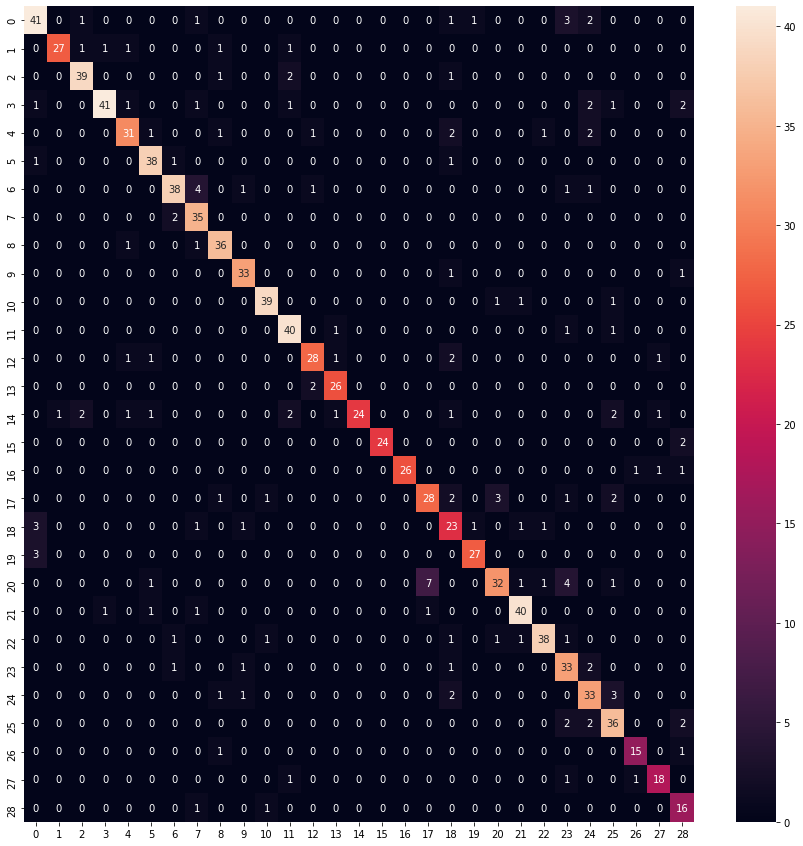

In [34]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='.0f')

In [45]:
# Grayscale only
def predict_img(path_to_img):
  img = cv2.imread(path_to_img, cv2.IMREAD_GRAYSCALE)
  # plt.imshow(img, cmap='gray')
  
  print(type(img), img.shape)
  # reshape img into a 64,64,1
  img = cv2.resize(img, (64,64))
  plt.imshow(img, cmap='gray')
  img = img.reshape(64,64,1)
  print(type(img), img.shape)

  img = np.asarray([img])
  img = img / 255.0
  pred = loaded_model.predict(img)
  pred = np.argmax(pred, axis=-1)[0]
  print('predicted:', CATEGORIES[pred])
  return

In [41]:
path = "/content/sharon_A_test.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

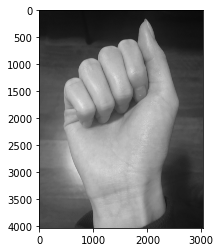

In [42]:
plt.imshow(img, cmap='gray')

<class 'numpy.ndarray'> (4032, 3024)
<class 'numpy.ndarray'> (64, 64, 1)


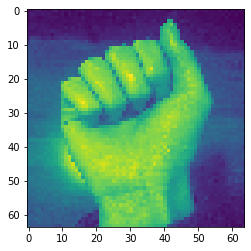

In [43]:
print(type(img), img.shape)
# reshape img into a 64,64,1
img = cv2.resize(img, (64,64))
plt.imshow(img)
img = img.reshape(64,64,1)
print(type(img), img.shape)

In [44]:
img = np.asarray([img])
img = img / 255.0
pred = loaded_model.predict(img)
pred = np.argmax(pred, axis=-1)[0]
print('predicted:', CATEGORIES[pred])

predicted: A


<class 'numpy.ndarray'> (1386, 1080)
<class 'numpy.ndarray'> (64, 64, 1)
predicted: S


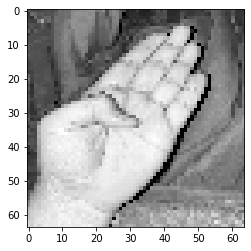

In [51]:
path_to_img = '/content/bryan_B_test.png'

predict_img(path_to_img=path_to_img)